## 1. Getting Started

[Doc: getting started](https://robomimic.github.io/docs/introduction/getting_started.html)
To use tensorboard, run
```bash
tensorboard --logdir bc_trained_models/test --host 127.0.0.1 --port 6006
```

### 1.1. Off-screen renderer test

[robosuite WARNING] No private macro file found! (macros.py:57)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:58)
[robosuite WARNING] To setup, run: python /home1/kwang570/.conda/envs/latent_sope/lib/python3.10/site-packages/robosuite/scripts/setup_macros.py (macros.py:59)
[robosuite WARNING] Could not import robosuite_models. Some robots may not be available. If you want to use these robots, please install robosuite_models from source (https://github.com/ARISE-Initiative/robosuite_models) or through pip install. (__init__.py:30)
[robosuite WARNING] Could not load the mink-based whole-body IK. Make sure you install related import properly, otherwise you will not be able to use the default IK controller setting for GR1 robot. (__init__.py:40)
[robosuite INFO] Loading controller configuration from: /home1/kwang570/.conda/envs/latent_sope/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)

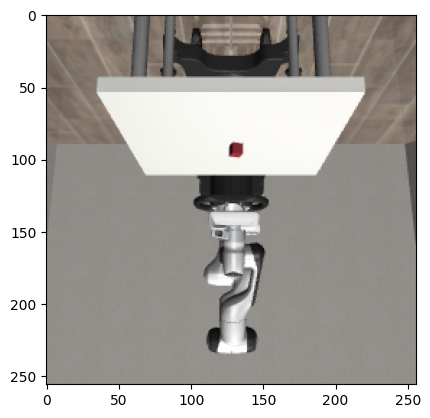

[robosuite INFO] Loading controller configuration from: /home1/kwang570/.conda/envs/latent_sope/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
INFO:robosuite_logs:Loading controller configuration from: /home1/kwang570/.conda/envs/latent_sope/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json


	frame dtype/shape: uint8 (256, 256, 3)
	frame min/max: 7 255
	✅ robosuite render OK

============= Initialized Observation Utils with Obs Spec =============

using obs modality: low_dim with keys: []
using obs modality: rgb with keys: []
using obs modality: depth with keys: []
using obs modality: scan with keys: []


[robosuite INFO] Loading controller configuration from: /home1/kwang570/.conda/envs/latent_sope/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
INFO:robosuite_logs:Loading controller configuration from: /home1/kwang570/.conda/envs/latent_sope/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json


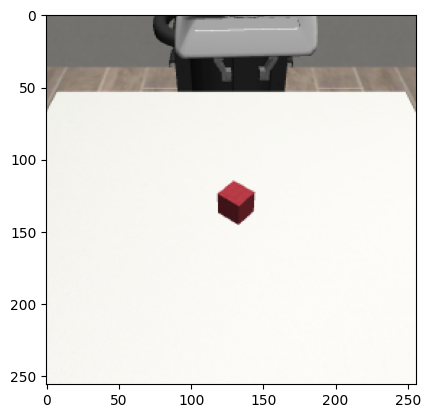

	robomimic rgb_array: <class 'numpy.ndarray'> (256, 256, 3) uint8
	✅ robomimic render OK


In [1]:
# Off-screen renderer test
import os
import numpy as np
import matplotlib.pyplot as plt
import robosuite as suite
from robomimic.envs.env_robosuite import EnvRobosuite
import robomimic.utils.obs_utils as ObsUtils

os.environ["MUJOCO_GL"] = "egl"
os.environ["PYOPENGL_PLATFORM"] = "egl"
os.environ["MUJOCO_EGL_DEVICE_ID"] = os.environ.get("MUJOCO_EGL_DEVICE_ID", "0")

def test_robosuite_offscreen_render():
    env = suite.make(
        env_name="Lift",
        robots="Panda",
        has_renderer=False,              # no onscreen window
        has_offscreen_renderer=True,     # we want rgb_array frames
        use_camera_obs=False,
        control_freq=20,
    )
    env.reset()
    frame = env.sim.render(height=256, width=256, camera_name="frontview")

    plt.imshow(frame); plt.show()
    print("\tframe dtype/shape:", frame.dtype, frame.shape)
    print("\tframe min/max:", np.min(frame), np.max(frame))
    print("\t✅ robosuite render OK")
    
def test_robomimic_offscreen_render():
    
    ObsUtils.initialize_obs_utils_with_obs_specs({
        "obs":  {"low_dim": [], "rgb": [], "depth": [], "scan": []},
        "goal": {"low_dim": [], "rgb": [], "depth": [], "scan": []},
    })

    
    env = EnvRobosuite(
        env_name="Lift",
        robots="Panda",
        render=False,          # no onscreen
        render_offscreen=True, # important
        use_image_obs=False,
    )

    env.reset()
    img = env.render(mode="rgb_array", height=256, width=256)
    plt.imshow(img); plt.show()
    print("\trobomimic rgb_array:", type(img), getattr(img, "shape", None), getattr(img, "dtype", None))
    print("\t✅ robomimic render OK")

test_robosuite_offscreen_render()
test_robomimic_offscreen_render()


### 1.2. Training pipeline sanity check: train_bc_rnn.py (~1.5 min)

In [2]:
# python examples/train_bc_rnn.py --debug
import sys, subprocess
from pathlib import Path

REPO_ROOT = Path.cwd().resolve().parent
ROBOMIMIC_CWD = REPO_ROOT / "third_party" / "robomimic"
print(f"robomimic working directory: {ROBOMIMIC_CWD}")

cmd = [sys.executable, str(ROBOMIMIC_CWD / "examples" / "train_bc_rnn.py"), 
       "--debug"]
subprocess.run(cmd, input="y\n", text=True, check=True, cwd=str(ROBOMIMIC_CWD))

robomimic working directory: /home1/kwang570/repos/latent_sope/third_party/robomimic


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
[robosuite WARNING] No private macro file found! (macros.py:57)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:58)
[robosuite WARNING] To setup, run: python /home1/kwang570/.conda/envs/latent_sope/lib/python3.10/site-packages/robosuite/scripts/setup_macros.py (macros.py:59)
[robosuite WARNING] Could not import robosuite_models. Some robots may not be available. If you want to use these robots, please install robosuite_models from source (https://github.com/ARISE-Initiative/robosuite_models) or through pip install. (__init__.py:30)
[robosuite WARNING] Could not load the mink-based whole-body IK. Make sure you install related import properly, otherwise you will not 


============= New Training Run with Config =============
{
    "algo_name": "bc",
    "experiment": {
        "name": "robosuite_bc_rnn_example",
        "validate": true,
        "logging": {
            "terminal_output_to_txt": false,
            "log_tb": true,
            "log_wandb": false,
            "wandb_proj_name": "debug"
        },
        "save": {
            "enabled": true,
            "every_n_seconds": null,
            "every_n_epochs": 1,
            "epochs": [],
            "on_best_validation": false,
            "on_best_rollout_return": false,
            "on_best_rollout_success_rate": true
        },
        "epoch_every_n_steps": 3,
        "validation_epoch_every_n_steps": 3,
        "env": null,
        "additional_envs": null,
        "render": false,
        "render_video": true,
        "keep_all_videos": false,
        "video_skip": 5,
        "rollout": {
            "enabled": true,
            "n": 2,
            "horizon": 10,
            "rate"

CompletedProcess(args=['/home1/kwang570/.conda/envs/latent_sope/bin/python', '/home1/kwang570/repos/latent_sope/third_party/robomimic/examples/train_bc_rnn.py', '--debug'], returncode=0)

### 1.3 Actually train a diffusion policy (~15 minutes)

This scripts can run for a long time, feel free to terminate it early after a few checkpoints have been saved.

Robomimic has an open issue with [rendering diffusion policy rollouts](https://github.com/ARISE-Initiative/robomimic/issues/269).
- The current solution is setting `render_video=False` in [exp/templates/diffusion_policy.json](../third_party/robomimic/robomimic/exps/templates/diffusion_policy.json).

In [ ]:
import os, sys, subprocess
from pathlib import Path

os.environ["MUJOCO_GL"] = "glx"
os.environ["PYOPENGL_PLATFORM"] = "glx"
os.environ["MUJOCO_EGL_DEVICE_ID"] = os.environ.get("MUJOCO_EGL_DEVICE_ID", "0")

REPO_ROOT = Path.cwd().resolve().parent
ROBOMIMIC_CWD = REPO_ROOT / "third_party" / "robomimic"

print(f"robomimic working directory: {ROBOMIMIC_CWD}")
assert ROBOMIMIC_CWD.is_dir(), f"robomimic dir not found: {ROBOMIMIC_CWD}"

# 1) Download datasets (run from robomimic/)
cmd = [sys.executable, "-m", "robomimic.scripts.download_datasets",
       "--tasks", "lift", "--dataset_types", "ph"]
subprocess.run(cmd, input="y\n",  # automatically pass y to download_datasets.py when propted "Overwrite?"
               text=True, check=True, cwd=str(ROBOMIMIC_CWD))

# 2) Train (run from robomimic/)
cmd = [sys.executable, "-m", "robomimic.scripts.train",
       "--config", "robomimic/exps/templates/diffusion_policy.json",
    #    "--config", "robomimic/exps/templates/bc.json",
       "--dataset", "datasets/lift/ph/low_dim_v15.hdf5"]
subprocess.run(cmd, input="y\n", text=True, check=True, cwd=str(ROBOMIMIC_CWD))

robomimic working directory: /home1/kwang570/repos/latent_sope/third_party/robomimic


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.



    task: lift
    dataset type: ph
    hdf5 type: low_dim
    download path: /home1/kwang570/repos/latent_sope/third_party/robomimic/datasets/lift/ph



Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.



============= New Training Run with Config =============
{
    "algo_name": "diffusion_policy",
    "experiment": {
        "name": "test",
        "validate": false,
        "logging": {
            "terminal_output_to_txt": true,
            "log_tb": true,
            "log_wandb": false,
            "wandb_proj_name": "debug"
        },
        "save": {
            "enabled": true,
            "every_n_seconds": null,
            "every_n_epochs": 50,
            "epochs": [],
            "on_best_validation": false,
            "on_best_rollout_return": false,
            "on_best_rollout_success_rate": true
        },
        "epoch_every_n_steps": 100,
        "validation_epoch_every_n_steps": 10,
        "env": null,
        "additional_envs": null,
        "render": false,
        "render_video": false,
        "keep_all_videos": false,
        "video_skip": 5,
        "rollout": {
            "enabled": true,
            "n": 50,
            "horizon": 400,
            "rate

## 2. Generate Rollout Policy Checkpoint

In [5]:
%load_ext autoreload
%autoreload 2
import sys
from copy import deepcopy
from pathlib import Path
from typing import Dict, List, Tuple
from IPython.display import display
import h5py
import imageio

import numpy as np
import torch
import flax.nnx as nnx # only used here for displaying h5 trees

repo_root = Path('../')
sys.path.append(str(repo_root))

import robomimic.utils.obs_utils as ObsUtils
from robomimic.models.policy_nets import ActorNetwork, GaussianActorNetwork
from robomimic.models.diffusion_policy_nets import ConditionalUnet1D

from src.latent_sope.robomimic_interface.rollout import (
    rollout,
    RolloutPolicy,
    RolloutLatentRecorder,
    RolloutLatentTrajectory,
    save_rollout_latents,
    get_policy_frame_stack,
    PolicyFeatureHook,
)
from src.latent_sope.robomimic_interface.checkpoints import (
    load_checkpoint,
    load_demo,
    build_h5_tree,
    build_algo_from_checkpoint,
    build_env_from_checkpoint,
    build_rollout_policy_from_checkpoint,
    prepare_obs,
    EnvBase,
)
from src.latent_sope.utils.common import CONSOLE_LOGGER

dataset_path = Path("../third_party/robomimic/datasets/lift/ph/low_dim_v15.hdf5")
# policy_train_dir = Path("../third_party/robomimic/bc_trained_models/test/20260119152203")
test_dir = Path("../third_party/robomimic/diffusion_policy_trained_models/test")
policy_train_dirs = sorted([d for d in test_dir.glob("*") if d.is_dir()])
assert len(policy_train_dirs) > 0, "No policy train dirs found, you have to train a policy first!"
policy_train_dir = policy_train_dirs[-1]

output_video_path = policy_train_dir / "rollout.mp4"
output_latents_path = policy_train_dir / "rollout_latents.h5"
demo_index = 0
num_steps = 60

""" 1. Load policy and environment from checkpoint """
policy_model_checkpoint = load_checkpoint(policy_train_dir.resolve(),
                                          ckpt_path="last.pth")
policy_algo = build_algo_from_checkpoint(policy_model_checkpoint)
policy_net: ActorNetwork | ConditionalUnet1D = policy_algo.nets.policy
policy:RolloutPolicy = build_rollout_policy_from_checkpoint(policy_model_checkpoint, 
                                              device=torch.device("cuda"), verbose=False)
env:EnvBase = build_env_from_checkpoint(
    policy_model_checkpoint,
    render=False,
    render_offscreen=True,
    verbose=False,
)

""" Prepare video writer"""


with h5py.File(dataset_path, "r") as h5:
    
    """ 2. Load h5 file using h5py and examine the structure """
    print("==== Showing dataset h5 tree (max_depth=2):")
    nnx.display(build_h5_tree(h5, max_depth=2))
    print("\n==== Showing data.demo_0 tree: ")
    nnx.display(build_h5_tree(h5["data"]["demo_0"], max_children=10))
    
    demo_keys = sorted(list(h5["data"].keys())) # ['demo_0', 'demo_1', 'demo_10', ...]
    demo_str_id = demo_keys[demo_keys.index(f"demo_{demo_index}")]
    obs_keys = sorted(list(h5["data"][demo_str_id]["obs"].keys())) # ['object', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eef_quat_site', ...]
    
    global_cfg_keys = set(policy_algo.global_config.all_obs_keys)
    obs_keys = [k for k in obs_keys if k in global_cfg_keys]
    obs_keys_visual = [k for k in obs_keys 
                       if ObsUtils.key_is_obs_modality(key=k, obs_modality="rgb") 
                       or ObsUtils.key_is_obs_modality(key=k, obs_modality="depth")]
    
    print(f"\n==== obs_keys filtered by global cfg: ")
    print(obs_keys)
    
    obs_np, actions_np = load_demo(h5, demo_str_id, obs_keys, num_steps)
    
    # obs_stats = policy_model_checkpoint.ckpt_dict.get("obs_normalization_stats", None)
    obs_stats = None
    obs_torch = prepare_obs(obs_np, device=policy_algo.device, obs_stats=obs_stats)
    actions_torch = torch.as_tensor(actions_np, device=policy_algo.device, dtype=torch.float32)
    
    print(f"\n==== Tensors in obs_torch: ")
    print("\n".join([f"\t{k}: {v.shape}, {v.device}, {v.dtype}" for k, v in obs_torch.items()]))
    print(f"\n==== actions_t: {actions_torch.shape}, {actions_torch.device}, {actions_torch.dtype} \n")
    
    
    """ 3. Build rollout policy """
    video_writer = imageio.get_writer(str(output_video_path), fps=20)
    camera_names = ['agentview']
    
    frame_stack = get_policy_frame_stack(policy)
    feature_hook = PolicyFeatureHook(
        policy,
        feat_type="low_dim_concat",
    )
    recorder = RolloutLatentRecorder(
        feature_hook,
        obs_keys=obs_keys,
        store_obs=True,
        store_next_obs=False,
    )
    stats = rollout(
        policy=policy,
        env=env,
        horizon=num_steps,
        render=False,
        video_writer=video_writer,
        video_skip=1,
        camera_names=camera_names,
        recorder=recorder,
    )
    video_writer.close()

print(f"==== Rollout video saved at \n{output_video_path.resolve()}")

traj:RolloutLatentTrajectory = recorder.finalize(stats)
save_rollout_latents(output_latents_path, traj)
print(f"==== Saved rollout latents at \n{output_latents_path.resolve()}")
print(f"==== Rollout latents traj object:")
nnx.display(traj)

allclose = np.allclose(traj.latents, np.concatenate([traj.obs[k] for k in traj.obs.keys()], axis=-1))
print("==== feats @traj.latents stored by @PolicyFeatureHook should be\n" +
     f"     close to feats @traj.obs. Are they? {allclose}")
assert allclose, "latents and stacked obs should be close"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

============= Initialized Observation Utils with Obs Spec =============

using obs modality: low_dim with keys: ['robot0_eef_pos', 'object', 'robot0_eef_quat', 'robot0_gripper_qpos']
using obs modality: rgb with keys: []
using obs modality: depth with keys: []
using obs modality: scan with keys: []
number of parameters: 6.576359e+07


[00:44:38] INFO     build_algo_from_checkpoint took 0.33 seconds to execute                           ]8;id=477757;file:///home1/kwang570/repos/latent_sope/scripts/../src/latent_sope/utils/common.py\common.py]8;;\:]8;id=953008;file:///home1/kwang570/repos/latent_sope/scripts/../src/latent_sope/utils/common.py#137\137]8;;\


============= Initialized Observation Utils with Obs Spec =============

using obs modality: low_dim with keys: ['robot0_eef_pos', 'object', 'robot0_eef_quat', 'robot0_gripper_qpos']
using obs modality: rgb with keys: []
using obs modality: depth with keys: []
using obs modality: scan with keys: []
number of parameters: 6.576359e+07


           INFO     build_rollout_policy_from_checkpoint took 0.84 seconds to execute                 ]8;id=458837;file:///home1/kwang570/repos/latent_sope/scripts/../src/latent_sope/utils/common.py\common.py]8;;\:]8;id=741877;file:///home1/kwang570/repos/latent_sope/scripts/../src/latent_sope/utils/common.py#137\137]8;;\

[robosuite WARNING] No private macro file found! (macros.py:57)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:58)
[robosuite WARNING] To setup, run: python /home1/kwang570/.conda/envs/latent_sope/lib/python3.10/site-packages/robosuite/scripts/setup_macros.py (macros.py:59)
[robosuite WARNING] Could not import robosuite_models. Some robots may not be available. If you want to use these robots, please install robosuite_models from source (https://github.com/ARISE-Initiative/robosuite_models) or through pip install. (__init__.py:30)
[robosuite WARNING] Could not load the mink-based whole-body IK. Make sure you install related import properly, otherwise you will not be able to use the default IK controller setting for GR1 robot. (__init__.py:40)


Created environment with name Lift
Action size is 7
ROBOMIMIC WARNING(
    Dataset and installed environment version mismatch!
    Dataset environment version: 1.5.1
    Installed environment version: 1.5.2
)


[00:44:40] INFO     build_env_from_checkpoint took 2.13 seconds to execute                            ]8;id=108487;file:///home1/kwang570/repos/latent_sope/scripts/../src/latent_sope/utils/common.py\common.py]8;;\:]8;id=881511;file:///home1/kwang570/repos/latent_sope/scripts/../src/latent_sope/utils/common.py#137\137]8;;\

==== Showing dataset h5 tree (max_depth=2):



==== Showing data.demo_0 tree: 



==== obs_keys filtered by global cfg: 
['object', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_gripper_qpos']


[00:44:41] INFO     load_demo took 0.00 seconds to execute                                            ]8;id=67976;file:///home1/kwang570/repos/latent_sope/scripts/../src/latent_sope/utils/common.py\common.py]8;;\:]8;id=844782;file:///home1/kwang570/repos/latent_sope/scripts/../src/latent_sope/utils/common.py#137\137]8;;\


==== Tensors in obs_torch: 
	object: torch.Size([59, 10]), cuda:0, torch.float32
	robot0_eef_pos: torch.Size([59, 3]), cuda:0, torch.float32
	robot0_eef_quat: torch.Size([59, 4]), cuda:0, torch.float32
	robot0_gripper_qpos: torch.Size([59, 2]), cuda:0, torch.float32

==== actions_t: torch.Size([59, 7]), cuda:0, torch.float32 

ObservationKeyToModalityDict: robot0_joint_pos not found, adding robot0_joint_pos to mapping with assumed low_dim modality!
ObservationKeyToModalityDict: robot0_joint_pos_cos not found, adding robot0_joint_pos_cos to mapping with assumed low_dim modality!
ObservationKeyToModalityDict: robot0_joint_pos_sin not found, adding robot0_joint_pos_sin to mapping with assumed low_dim modality!
ObservationKeyToModalityDict: robot0_joint_vel not found, adding robot0_joint_vel to mapping with assumed low_dim modality!
ObservationKeyToModalityDict: robot0_joint_acc not found, adding robot0_joint_acc to mapping with assumed low_dim modality!
ObservationKeyToModalityDict: robo

[00:44:46] INFO     rollout took 5.47 seconds to execute                                              ]8;id=150903;file:///home1/kwang570/repos/latent_sope/scripts/../src/latent_sope/utils/common.py\common.py]8;;\:]8;id=485177;file:///home1/kwang570/repos/latent_sope/scripts/../src/latent_sope/utils/common.py#137\137]8;;\

==== Rollout video saved at 
/home1/kwang570/repos/latent_sope/third_party/robomimic/diffusion_policy_trained_models/test/20260119163539/rollout.mp4
==== Saved rollout latents at 
/home1/kwang570/repos/latent_sope/third_party/robomimic/diffusion_policy_trained_models/test/20260119163539/rollout_latents.h5
==== Rollout latents traj object:


==== feats @traj.latents stored by @PolicyFeatureHook should be
     close to feats @traj.obs. Are they? True


## 3. Load Policy Rollout Checkpoint and Train Chunk Diffusion Model modules

**Policy diffusion:** Implemented in [policy.py](../third_party/sope/opelab/core/policy.py) as `DiffusionPolicy`, which wraps [CleanDiffuser](https://github.com/CleanDiffuserTeam/CleanDiffuser) components (`PearceMlp`, `PearceObsCondition`, `DiscreteDiffusionSDE`) to sample actions from observations.

**Trajectory-chunk diffusion (sequence model):** 
- Implemented in [temporal.py](../third_party/sope/opelab/core/baselines/diffusion/temporal.py) (`TemporalUnet` backbone)
- Wrapped by [diffusion.py](../third_party/sope/opelab/core/baselines/diffusion/diffusion.py) (`GaussianDiffusion` sampler)
- Used by [diffuser.py](../third_party/sope/opelab/core/baselines/diffuser.py) to generate chunked trajectories.

**Guidance link between them:**  During chunked sampling, the trajectory diffusion uses the policy diffusion to compute guidance gradients. 
- In [diffusion.py](../third_party/sope/opelab/core/baselines/diffusion/diffusion.py), `default_sample_fn(...)` checks the policy type and calls `gradlog_diffusion(...)`
- which in turn calls `DiffusionPolicy.grad_log_prob(...)` in [policy.py](../third_party/sope/opelab/core/policy.py) to get a score/grad-log term. 
- This gradient is scaled and injected into the trajectory diffusion step as the guidance term.


In [ ]:
%load_ext autoreload
%autoreload 2
import sys
from copy import deepcopy
from pathlib import Path
from IPython.display import display

import numpy as np
import torch
import flax.nnx as nnx # only used here for displaying h5 trees

repo_root = Path('../')
sys.path.append(str(repo_root))

from src.latent_sope.utils.common import CONSOLE_LOGGER
from src.latent_sope.robomimic_interface.rollout import RolloutLatentTrajectory
from src.latent_sope.robomimic_interface.dataset import (
    RolloutChunkDatasetConfig,
    RolloutChunkDataset,
    load_rollout_latents,
    make_rollout_chunk_dataloader,
)
from src.latent_sope.diffusion.ddpm_latents import SopeChunkDiffusionConfig, SopeChunkDiffusion

test_dir = Path("../third_party/robomimic/diffusion_policy_trained_models/test")
policy_train_dirs = sorted([d for d in test_dir.glob("*") if d.is_dir()])
assert len(policy_train_dirs) > 0, "No policy train dirs found, you have to train a policy first!"
policy_train_dir = policy_train_dirs[-1]

rollout_path = policy_train_dir / "rollout_latents.h5"
assert rollout_path.exists(), f"Missing rollout file: {rollout_path}. Update the path to a saved rollout."

dataset_config = RolloutChunkDatasetConfig()
data:RolloutLatentTrajectory = load_rollout_latents(rollout_path)
dataset:RolloutChunkDataset = RolloutChunkDataset(
    traj=data,
    config=dataset_config,
)

item = next(iter(dataset))
# frame_stack = 1
# obs_dim = data["z"].shape[1] * frame_stack
# action_dim = data["actions"].shape[1]

# dl, stats = make_rollout_chunk_dataloader(
#     paths=[rollout_path],
#     W=8,
#     stride=1,
#     batch_size=4,
#     frame_stack=frame_stack,
#     source="z",
#     include_actions=True,
#     normalize=True,
# )

# batch = next(iter(dl))
# if isinstance(batch, (list, tuple)):
#     batch = batch[0]

# cfg = SopeChunkDiffusionConfig(
#     horizon=8,
#     obs_dim=obs_dim,
#     action_dim=action_dim,
#     diffusion_steps=64,
# )
# device = "cuda" if torch.cuda.is_available() else "cpu"
# model = SopeChunkDiffusion(cfg, normalization_stats=stats, device=device)
# opt = model.make_optimizer()

# cond = model.make_cond(batch)
# loss, _ = model.loss(batch, cond)
# loss.backward()
# opt.step()
# opt.zero_grad()
# print("loss:", float(loss.item()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
nnx.display(item)